<a href="https://colab.research.google.com/github/LEEJaeWon820/NVIDIA/blob/Yolo/Yolo_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 1.jpg to 1 (1).jpg

0: 352x640 17 persons, 2 backpacks, 7 umbrellas, 2 handbags, 1 chair, 151.0ms
Speed: 5.0ms preprocess, 151.0ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)


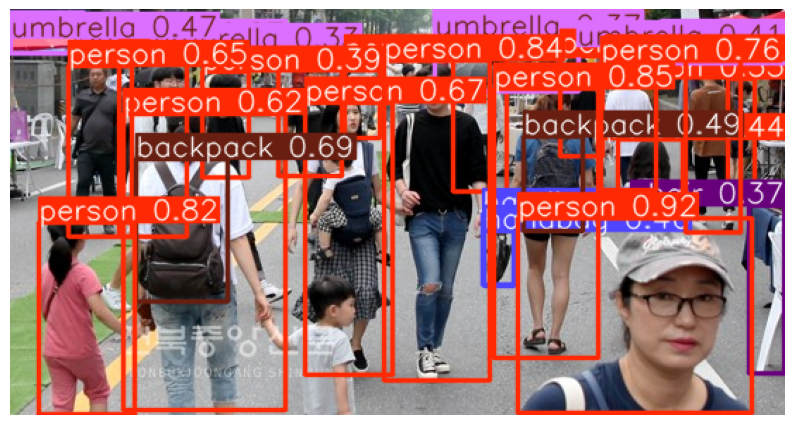

감지된 사람 수: 17


In [5]:
# 1. 필요한 라이브러리 설치
!pip install ultralytics

# 2. 필요한 모듈 임포트
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# 3. 이미지 업로드
uploaded = files.upload()  # '1.jpg' 파일을 업로드하세요

# 4. YOLOv8 모델 로드 (사전 학습된 모델 사용)
model = YOLO('yolov8n.pt')  # 'yolov8n.pt'는 가장 가벼운 모델, 필요 시 'yolov8s.pt', 'yolov8m.pt' 등 사용 가능

# 5. 이미지 읽기
image = cv2.imread('1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR -> RGB 변환

# 6. 객체 탐지 수행
results = model(image_rgb)

# 7. 결과 시각화
# 탐지된 객체를 이미지에 그리기
annotated_image = results[0].plot()  # YOLOv8의 plot() 메서드로 결과 이미지 생성

# 8. 결과 출력
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.axis('off')
plt.show()

# 9. 탐지된 사람 수 계산 및 출력
person_count = 0
for result in results[0].boxes:
    if result.cls == 0:  # YOLO에서 '0'은 'person' 클래스
        person_count += 1
print(f"감지된 사람 수: {person_count}")